<a href="https://colab.research.google.com/github/pinpan123/HandwritingRecognition/blob/main/HandwritingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist=fetch_openml('mnist_784')

In [ ]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
x,y=mnist['data'],mnist['target']

In [ ]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline

In [ ]:

import matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
some_digit = x.iloc[36001, :]
some_digit_image = some_digit.values.reshape(28,28)

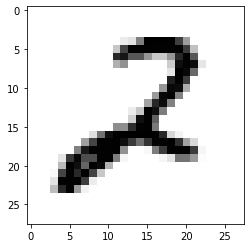

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

(-0.5, 27.5, 27.5, -0.5)

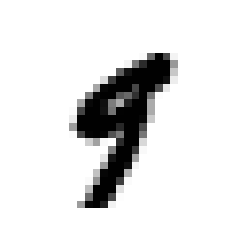

In [ ]:
some_digit = x.iloc[36000, :]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")

In [ ]:
y[36001]


'2'

In [ ]:
x_train, x_test=x[:60000], x[60000:]

In [ ]:
y_train, y_test=y[:60000], y[60000:]

In [38]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [39]:
#converts each string into an integer
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [40]:
y_train_2

8995     False
55682    False
34041    False
2027     False
10460    False
         ...  
57616    False
59108    False
24188    False
17228    False
14244     True
Name: class, Length: 60000, dtype: bool

In [41]:
y_train

8995     4
55682    0
34041    5
2027     7
10460    4
        ..
57616    8
59108    4
24188    0
17228    7
14244    2
Name: class, Length: 60000, dtype: int8

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf=LogisticRegression(tol=0.1)

In [44]:
clf.fit(x_train,y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(tol=0.1)

In [45]:
clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([False])

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.97905, 0.97785, 0.97845])

In [47]:
a=cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [48]:
a.mean() #Accuracy of trained classifier

0.97845